In [12]:
def split_and_shuffle_labels(y_data, seed, amount):
    y_data=pd.DataFrame(y_data,columns=["labels"]) # create DF on all y values
    y_data["i"]=np.arange(len(y_data)) # create a global index
    label_dict = dict()
    for i in range(10):
        var_name="label" + str(i)
        label_info=y_data[y_data["labels"]==i] # create an index for each class
        np.random.seed(seed)
        label_info=np.random.permutation(label_info)
        label_info=label_info[0:amount]
        label_info=pd.DataFrame(label_info, columns=["labels","i"])
        label_dict.update({var_name: label_info })
    return label_dict

In [13]:
def get_iid_subsamples_indices(label_dict, number_of_samples, amount):
    sample_dict= dict()
    batch_size=int(math.floor(amount/number_of_samples)) # 45
    for i in range(number_of_samples): # create 100 number_of_samples
        sample_name="sample"+str(i)
        dumb=pd.DataFrame()
        for j in range(10): # for each number 0 - 9
            label_name=str("label")+str(j)
            a=label_dict[label_name][i*batch_size:(i+1)*batch_size] # get 45 record of one number 
            dumb=pd.concat([dumb,a], axis=0) # concat total 10 of them 0 - 9
        dumb.reset_index(drop=True, inplace=True)    
        sample_dict.update({sample_name: dumb}) # each sample 450, 100 samples
    return sample_dict

In [14]:
def create_iid_subsamples(sample_dict, x_data, y_data, x_name, y_name):
    x_data_dict= dict()
    y_data_dict= dict()
    
    for i in range(len(sample_dict)):  ### len(sample_dict)= number of samples 100
        xname= x_name+str(i)
        yname= y_name+str(i)
        sample_name="sample"+str(i)
        
        # use the global index to connect x and y
        indices=np.sort(np.array(sample_dict[sample_name]["i"])) 
        
        x_info= x_data[indices,:]
        x_data_dict.update({xname : x_info})
        
        y_info= y_data[indices]
        y_data_dict.update({yname : y_info})
        
    return x_data_dict, y_data_dict

In [2]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import random
import math
from torch.utils.tensorboard import SummaryWriter
from matplotlib import pyplot as plt


from pathlib import Path
import requests
import pickle
import gzip

import torch
import math
import torch.nn.functional as F
from torch import nn
from torch import optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from sklearn.mixture import GaussianMixture

In [ ]:
# First create some toy data:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create just a figure and only one subplot
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)

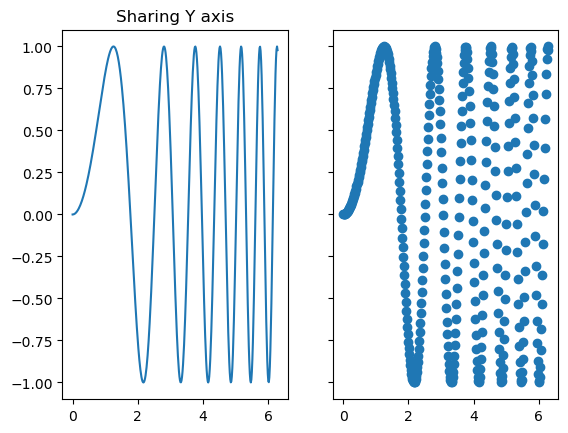

In [6]:
x = np.linspace(0, 2*np.pi, 400)
y = np.sin(x**2)

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)
plt.show()

In [2]:
from collections import defaultdict

In [3]:
per_participant_list = defaultdict(list)

In [4]:
per_participant_list

defaultdict(list, {})

In [7]:
import numpy as np

In [8]:
amount = 4500
number_of_samples = 100
alpha = 0.9

In [9]:
sampled_probabilities = amount * np.random.dirichlet(
                np.array(number_of_samples * [alpha]))

In [10]:
sampled_probabilities

array([ 34.44066508, 164.3567654 ,  10.43741873,   8.85857464,
       109.93039136,  31.4397708 ,  19.66020843,  39.32864405,
        28.01703935,  92.01534255,   1.6287609 ,  16.8856779 ,
        60.19593726,  91.99165933,   0.93234751,  67.7612929 ,
        43.22368158,  71.12315627,  21.24311751,  46.02707683,
         4.37791413,  11.19590094,  12.92987026,  15.29713649,
        34.93149426,   1.91806636,  28.16662117,  37.58822307,
        60.31021085,   9.27129331,   8.30896345,  14.93024459,
        57.59970969,  17.27369464,   8.77334561,  27.0122411 ,
        63.49774177,  10.10885235,  13.93420275,  20.06782936,
        93.50032211,   6.62230049,  56.74881662,  27.14176186,
        15.74110094, 144.80825837, 155.00808729,   8.361712  ,
        25.22353353,  17.82972158,  62.49448251,  28.26152623,
        38.95436899, 145.06495519, 139.37546127,  82.01694356,
       114.13707282,  73.62071368,   1.91311507,  70.62985192,
        11.49039598,   1.97987804,  15.92935646,   4.72

In [11]:
sum(sampled_probabilities)

4499.999999999998

In [1]:
import matplotlib.pyplot as plt

size = 256, 16
dpi = 72.0
figsize= size[0] / float(dpi), size[1] / float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)
plt.axes([0, 0, 1, 1], frameon=False)

for i in range(1,11):
    plt.plot([i, ], [1, ], 's', markersize=5,
         markeredgewidth=1 + i/10., markeredgecolor='k', markerfacecolor='w')
plt.xlim(0, 11)
plt.xticks([])
plt.yticks([])

plt.show()

In [1]:
t = [1,2,3,4]

In [2]:
t[-2]

3

In [3]:
import numpy as np

In [5]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [4]:
a = np.arange(6).reshape(3,2)

In [5]:
a

array([[0, 1],
       [2, 3],
       [4, 5]])

In [10]:
np.reshape(a, (6))

array([0, 1, 2, 3, 4, 5])

In [2]:
delta = [0,1,2,3,4,5,6,7,8,9]

In [5]:
delta[2:] 

[2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
for name, data in a.items():
    print (name)

AttributeError: 'numpy.ndarray' object has no attribute 'items'

In [8]:
import matplotlib.pyplot as plt
 
labels = []
for hood in hood_menu_data:
    labels.append(hood["properties"]['NAME'])
 
fig, ax = plt.subplots(figsize=(20,20))
cax = ax.matshow(hood_cosine_matrix, interpolation='nearest')
ax.grid(True)
plt.title('San Francisco Similarity matrix')
plt.xticks(range(33), labels, rotation=90);
plt.yticks(range(33), labels);
fig.colorbar(cax, ticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, .75,.8,.85,.90,.95,1])
plt.show()

NameError: name 'hood_menu_data' is not defined

In [9]:
range(100)

range(0, 100)

In [10]:
list(range(0, 99))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98]

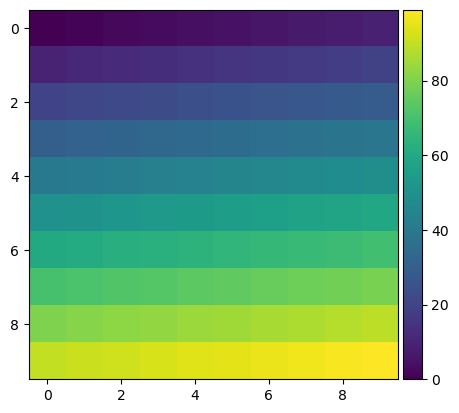

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
    
plt.figure()
ax = plt.gca()
im = ax.imshow(np.arange(100).reshape((10,10)))
    
# create an axes on the right side of ax. The width of cax will be 5%
# of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
   
plt.colorbar(im,cax=cax)
plt.show()

In [1]:
import torch
from torchmetrics.functional import kl_divergence
p = torch.tensor([[0.36, 0.48, 0.16]])
q = torch.tensor([[1/3, 1/3, 1/3]])
kl_divergence(p, q)

ModuleNotFoundError: No module named 'torchmetrics'

In [2]:
! conda install -c conda-forge torchmetrics

^C


In [6]:
import torch.nn.functional as F
p = torch.tensor([[0.36, 0.48, 0.16]])
q = torch.tensor([[1/3, 1/3, 1/3]])
out = F.kl_div(p, q)

In [7]:
out

tensor(-0.4773)

In [5]:
F.kl_div(q, p)

tensor(-0.4489)

In [8]:
import torch
from torchmetrics.functional import kl_divergence
p = torch.tensor([[0.36, 0.48, 0.16]])
q = torch.tensor([[1/3, 1/3, 1/3]])
kl_divergence(p, q)

tensor(0.0853)

In [9]:
kl_divergence(q, p)

tensor(0.0975)

In [10]:
p = torch.tensor([[0.10, 0.40, 0.50]])
q = torch.tensor([[0.80, 0.15, 0.05]])
kl_divergence(p, q)

tensor(1.3357)

In [11]:
P = [.05, .1, .2, .05, .15, .25, .08, .12]
Q = [.3, .1, .2, .1, .1, .02, .08, .1]

In [12]:
from scipy.special import rel_entr

#calculate (P || Q)
sum(rel_entr(P, Q))

0.589885181619163

In [13]:
P = [0.36, 0.48, 0.16]
Q = [1/3, 1/3, 1/3]

In [14]:
sum(rel_entr(P, Q))

0.0852996013183706

In [17]:
import numpy as np

In [20]:
a = np.asarray([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])

In [22]:
a[2,:]

array([7, 8, 9])

In [23]:
9%10

9

In [24]:
a = [1,2,3,4,5,6,7,8,9,10,11]

In [25]:
a[0:3]

[1, 2, 3]